# CMP223 Data Analysis

TODO escrever aqui as coisas bonitas

This notebook yada yada etc

The .csv file with the energy measurements etc
This file is generated with the `./snmp_energy_monitor.sh` script making snmp requests to the PDU suplying energy to the partition--the poti partition in the PDU 123, in this case. The format is "date,Energy,ActivePower":

	date: YYYY-MM-DD hh:mm:ss
	Energy: cumulative value. integer, Wh
	Active Power: the usable or consumed electrical energy in an AC circuit. integer, W

## Idle experiment

In this experiment, we allocated the complete poti partition for a period of time and did nothing :) These measurements ran for a few hours, in two differents days. Let's take a look at them:

In [1]:
from matplotlib import style 
import matplotlib.pyplot as plt
import pandas as pd
# precisei desabilitar uns warning aqui por causa da iteração na lista de dataframes :')
pd.options.mode.chained_assignment = None  # default='warn'

#idle_1 = pd.read_csv('./data/idle_poti/energy_monitor_123_2025-09-10.csv', usecols=['Time', 'Energy', 'Active_Power'])
idle = pd.read_csv('./data/idle_poti/energy_monitor_123_2025-09-15.csv', usecols=['Time', 'Energy', 'Active_Power'])

# Convering the 'Time' column to datetime format, and adding a fourth column with the elapsed time since the beggining of the measurements
idle['Time'] = pd.to_datetime(idle['Time'], format='%Y-%m-%d %H:%M:%S')
idle['Elapsed'] = idle['Time'].sub(idle['Time'].iloc[0])
idle['Elapsed'] = idle['Elapsed'].dt.seconds

# TODO arrumar o valor em 'Elapsed' que deu overflow em int32 :)))
idle

,Time,Energy,Active_Power,Elapsed
0,2025-09-15 10:38:46,6670945.0,313.0,0
1,2025-09-15 10:38:46,6670945.0,313.0,0
2,2025-09-15 10:38:46,6670945.0,313.0,0
3,2025-09-15 10:38:46,6670945.0,313.0,0
4,2025-09-15 10:38:47,6670945.0,313.0,1
...,...,...,...,...
520335,2025-09-16 13:08:40,6679587.0,312.0,8994
520336,2025-09-16 13:08:41,6679587.0,312.0,8995
520337,2025-09-16 13:08:41,6679587.0,312.0,8995
520338,2025-09-16 13:08:41,6679587.0,312.0,8995


In [2]:
# pegando só as primeiras 12 horas do experimento pra facilitar a minha vida
idle = idle.loc[idle['Time'] <= '2025-09-15 22:38:46']

# aqui dá pra ver que a média pra essas 12 horas ficou em torno de 312W
idle.describe()

,Time,Energy,Active_Power,Elapsed
count,235474,2.354740e+05,235474.000000,235474.000000
mean,2025-09-15 16:39:20.525582336,6.672903e+06,312.045729,21634.525582
min,2025-09-15 10:38:46,6.670945e+06,310.000000,0.000000
25%,2025-09-15 13:39:27,6.671925e+06,312.000000,10841.000000
50%,2025-09-15 16:39:49.500000,6.672907e+06,312.000000,21663.500000
75%,2025-09-15 19:39:18,6.673882e+06,312.000000,32432.000000
max,2025-09-15 22:38:46,6.674855e+06,422.000000,43200.000000
std,NaN,1.128928e+03,1.519643,12471.855836


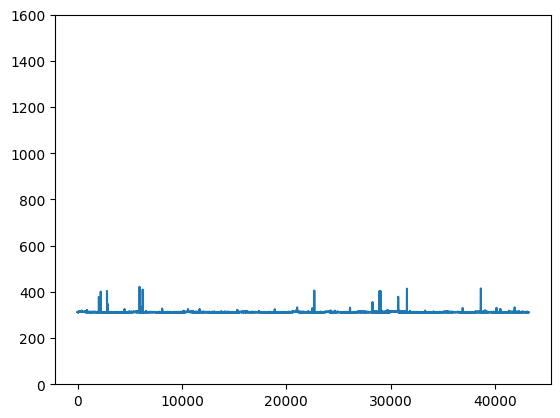

In [3]:
# First we vizualise the data

#idle.plot(x="Elapsed", y="Active_Power")

fig, ax = plt.subplots()
ax.plot(idle['Elapsed'], idle['Active_Power'])
ax.set_ylim(0,1600) #plots must begin at zero!!!, 1600 is just so we can have the same scale as the stress experiment


plt.style.use('bmh')
plt.show()
#print(plt.style.available)

In [4]:
# cortando o dataframe em intervalos de uma hora

interval_min = 0
interval_max = 3600
idle_list = list()

for i in range(12):
    idle_list.append(idle.loc[(idle['Elapsed'] >= interval_min) & (idle['Elapsed'] <= interval_max)])
    interval_min = interval_min + 3600
    interval_max = interval_max + 3600

# o resultado é uma lista de dataframes
idle_list

[                     Time     Energy  Active_Power  Elapsed
 0     2025-09-15 10:38:46  6670945.0         313.0        0
 1     2025-09-15 10:38:46  6670945.0         313.0        0
 2     2025-09-15 10:38:46  6670945.0         313.0        0
 3     2025-09-15 10:38:46  6670945.0         313.0        0
 4     2025-09-15 10:38:47  6670945.0         313.0        1
 ...                   ...        ...           ...      ...
 19582 2025-09-15 11:38:46  6671270.0         311.0     3600
 19583 2025-09-15 11:38:46  6671270.0         311.0     3600
 19584 2025-09-15 11:38:46  6671270.0         311.0     3600
 19585 2025-09-15 11:38:46  6671270.0         311.0     3600
 19586 2025-09-15 11:38:46  6671270.0         311.0     3600
 
 [19587 rows x 4 columns],
                      Time     Energy  Active_Power  Elapsed
 19581 2025-09-15 11:38:46  6671270.0         311.0     3600
 19582 2025-09-15 11:38:46  6671270.0         311.0     3600
 19583 2025-09-15 11:38:46  6671270.0         311.0     

In [5]:
# atualizar a coluna 'Elapsed' pra mostrar o tempo decorrido desde o inicio daquela hora

for index, hour in enumerate(idle_list):
    idle_list[index]['Elapsed'] = idle_list[index]['Time'].sub(idle_list[index]['Time'].iloc[0])
    idle_list[index]['Elapsed'] = idle_list[index]['Elapsed'].dt.seconds

idle_list

[                     Time     Energy  Active_Power  Elapsed
 0     2025-09-15 10:38:46  6670945.0         313.0        0
 1     2025-09-15 10:38:46  6670945.0         313.0        0
 2     2025-09-15 10:38:46  6670945.0         313.0        0
 3     2025-09-15 10:38:46  6670945.0         313.0        0
 4     2025-09-15 10:38:47  6670945.0         313.0        1
 ...                   ...        ...           ...      ...
 19582 2025-09-15 11:38:46  6671270.0         311.0     3600
 19583 2025-09-15 11:38:46  6671270.0         311.0     3600
 19584 2025-09-15 11:38:46  6671270.0         311.0     3600
 19585 2025-09-15 11:38:46  6671270.0         311.0     3600
 19586 2025-09-15 11:38:46  6671270.0         311.0     3600
 
 [19587 rows x 4 columns],
                      Time     Energy  Active_Power  Elapsed
 19581 2025-09-15 11:38:46  6671270.0         311.0        0
 19582 2025-09-15 11:38:46  6671270.0         311.0        0
 19583 2025-09-15 11:38:46  6671270.0         311.0     

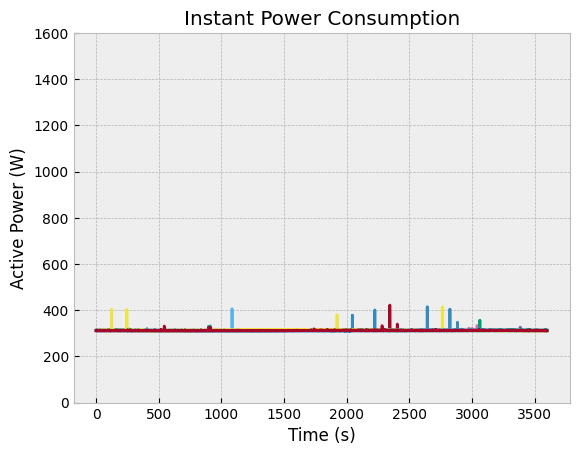

In [6]:
# plotar as 12 horas sobrepostas pra ficar mais fácil de visualizar

#fig = plt.figure(figsize=(12, 4))
fig = plt.figure()
ax = fig.add_subplot(111)

for index, hour in enumerate(idle_list):
   ax.plot(idle_list[index]['Elapsed'], idle_list[index]['Active_Power'])

ax.set_ylim(0,1600)
plt.title('Instant Power Consumption')
plt.xlabel('Time (s)')
plt.ylabel('Active Power (W)')

fig.savefig("figures/idle_instant.pdf")
plt.show()


This graph shows that the baseline of the active power stays constant around 310~320W

TODO put the formula here 

Let's do the same thing with the cummulative 'Energy' value, in Wh

In [7]:
# atualizar a coluna 'Energy' pra mostrar o total em Wh desde o inicio do período

idle_cumulative = list()

for index, hour in enumerate(idle_list):
    idle_list[index]['Energy'] = idle_list[index]['Energy'].sub(idle_list[index]['Energy'].iloc[0])
    # aproveitando pra salvar em uma lista o acumulado de cada período
    idle_cumulative.append(idle_list[index]['Energy'].iloc[-1])

idle_list[0]

,Time,Energy,Active_Power,Elapsed
0,2025-09-15 10:38:46,0.0,313.0,0
1,2025-09-15 10:38:46,0.0,313.0,0
2,2025-09-15 10:38:46,0.0,313.0,0
3,2025-09-15 10:38:46,0.0,313.0,0
4,2025-09-15 10:38:47,0.0,313.0,1
...,...,...,...,...
19582,2025-09-15 11:38:46,325.0,311.0,3600
19583,2025-09-15 11:38:46,325.0,311.0,3600
19584,2025-09-15 11:38:46,325.0,311.0,3600
19585,2025-09-15 11:38:46,325.0,311.0,3600


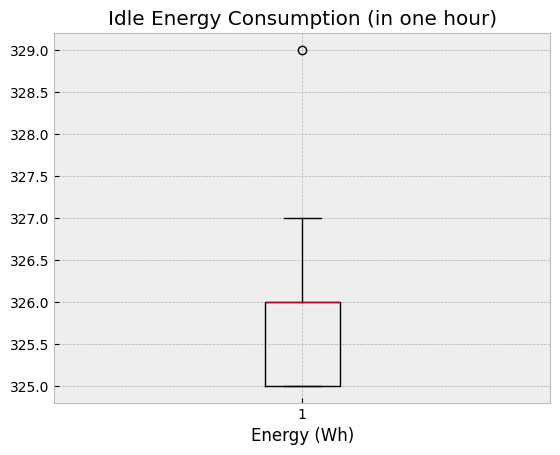

In [8]:
fig = plt.figure()

plt.boxplot(idle_cumulative)

plt.title('Idle Energy Consumption (in one hour)')
plt.xlabel('Energy (Wh)')
#plt.ylabel('Energy (Wh)')

fig.savefig("figures/idle_cumulative_boxplot.pdf")
plt.show()

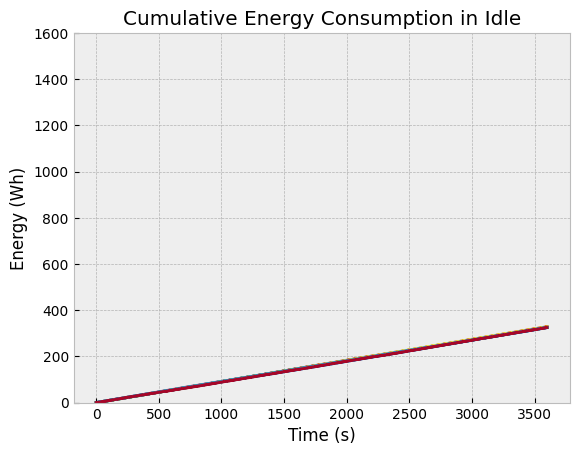

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

for index, hour in enumerate(idle_list):
   ax.plot(idle_list[index]['Elapsed'], idle_list[index]['Energy'])

ax.set_ylim(0,1600) 

plt.title('Cumulative Energy Consumption in Idle')
plt.xlabel('Time (s)')
plt.ylabel('Energy (Wh)')


fig.savefig("figures/idle_cumulative.pdf")
plt.show()

## Stress experiment

TODO completar aqui dps

Explanation about the stress experiment and the stress package we're using

The data of about the experiment etc etc

    time: total runtime of the experiment
    factors:
        cpu:
        io:
        memory:
        nodes:
    exp:
    order:
    start_ts:
    end_ts:



In [10]:
experiment = pd.read_csv("./data/stress_poti_5_nodes_735647/stress_poti_5_nodes_735647_output.csv", usecols=["time","cpu","io","memory","nodes","exp","order","start_ts","end_ts"])
#experiment = experiment.set_index('nodes')  # make sure indexes pair with number of nodes

experiment["start_ts"] = pd.to_datetime(experiment["start_ts"], format="%Y-%m-%d %H:%M:%S")
experiment["end_ts"] = pd.to_datetime(experiment["end_ts"], format="%Y-%m-%d %H:%M:%S")

experiment = experiment.sort_values(['nodes','cpu','memory','io']) # ordenar por numero de nodos, cpu, memoria, io
experiment = experiment.reset_index()
experiment.head()

,index,time,cpu,io,memory,nodes,exp,order,start_ts,end_ts
0,11,5m,0,24,0,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU0_IO24_MEM0_N1_12,2025-11-25 18:16:04,2025-11-25 18:21:04
1,12,5m,0,12,12,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU0_IO12_MEM12_N1_13,2025-11-25 18:21:34,2025-11-25 18:26:34
2,8,5m,0,0,24,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU0_IO0_MEM24_N1_9,2025-11-25 17:59:34,2025-11-25 18:04:34
3,4,5m,8,8,8,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU8_IO8_MEM8_N1_5,2025-11-25 17:37:34,2025-11-25 17:42:34
4,16,5m,12,12,0,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU12_IO12_MEM0_N1_17,2025-11-25 18:43:34,2025-11-25 18:48:34


Now we get the energy measurements from the other file

In [11]:
stress = pd.read_csv("./data/stress_poti_5_nodes_735647/energy_monitor_123_stress_5_nodes.csv", usecols=["Time", "Energy", "Active_Power"])
stress = stress.reset_index()  # make sure indexes pair with number of rows

stress["Time"] = pd.to_datetime(stress["Time"], format="%Y-%m-%d %H:%M:%S")
#stress["Elapsed"] = stress["Time"].sub(stress["Time"].iloc[0])
#stress["Elapsed"] = stress["Elapsed"].dt.seconds
#stress["Accumulated"] = stress["Energy"].diff()

stress.head()

,index,Time,Energy,Active_Power
0,0,2025-11-25 17:10:00,7415248,436
1,1,2025-11-25 17:10:00,7415248,436
2,2,2025-11-25 17:10:00,7415248,436
3,3,2025-11-25 17:10:00,7415248,436
4,4,2025-11-25 17:10:00,7415248,436


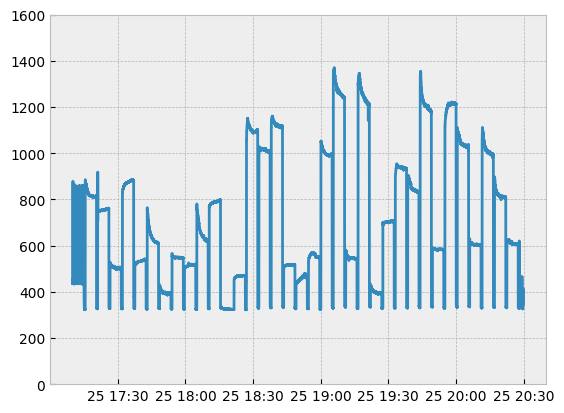

In [12]:
# vizualize it first
#stress.plot(x="Time", y="Active_Power")

fig, ax = plt.subplots()
ax.plot(stress['Time'], stress['Active_Power'])
ax.set_ylim(0,1600) #plots must begin at zero!!!, 1400 is just so we can have the same scale as the stress experiment
plt.show()

Utter joy (alegria total)

Now we need to slice the csv with the results so we can separate each experiment. Note: the `iterrows` function [is very slow](https://pandas.pydata.org/docs/user_guide/basics.html#iteration) and we only use it because we have a small list of experiments. For bigger lists we should use [something else](https://stackoverflow.com/questions/16476924/how-can-i-iterate-over-rows-in-a-pandas-dataframe/77270285#77270285).

Now I want to have all the experiment information together in the stress dataframe, like
```
Time,Energy,Active_Power,nodes,cpu,memory,io
2025-11-25 17:10:00, 7415248, 436, 1, 0, 0, 24
2025-11-25 17:10:01, 7415248, 436, 1, 0, 0, 24
2025-11-25 17:10:01, 7415248, 436, 1, 0, 0, 24
....
```

In [17]:
results_list = list()

for idx, row in experiment.iterrows():
    start_time = row['start_ts']
    end_time = row['end_ts']
    nodes = row['nodes']
    cpu = row['cpu']
    memory = row['memory']
    io = row['io']

    # works
    #print(stress.loc[(stress['Time']>start_time) & (stress['Time']<=end_time), 'index'])

    # don't work (throws error at 'in')
    #interval = pd.Interval(left=start_time, right=end_time)
    #stress.loc[stress['Time'] in interval, 'Nodes'] = nodes

    # don't work (nodes don't get assigned)
    #stress.loc[((stress['Time']>start_time) & (stress['Time']<=end_time)), 'Nodes'] = nodes

    # works sort of (had to create a list of dataframes again)
    results_list.append(stress.loc[((stress['Time']>start_time) & (stress['Time']<=end_time))])
    results_list[idx]['Nodes'] = nodes
    results_list[idx]['cpu'] = cpu
    results_list[idx]['memory'] = memory
    results_list[idx]['io'] = io

# aproveitando pra colocar junto no dataframe o tempo decorrido desde o começo de cada experimento
for index, result in enumerate(results_list):
    results_list[index]['Elapsed'] = results_list[index]['Time'].sub(results_list[index]['Time'].iloc[0])
    results_list[index]['Elapsed'] = results_list[index]['Elapsed'].dt.seconds
    #deu alguns warnings bizarros aqui pq a indexação ficou confusa e aí eu setei pra desabilitar :)



Concatenando todos os dataframes

In [18]:
results = pd.concat(results_list)

#i have. i have no idea why the dataframe kept the indexes from all the previous dataframes :(( !!!!!!!
results = results.drop('index', axis=1)
results = results.reset_index()
results = results.drop('index', axis=1)
results = results.reset_index()

results

,index,Time,Energy,Active_Power,Nodes,cpu,memory,io,Elapsed
0,0,2025-11-25 18:16:05,7415936,335,1,0,0,24,0
1,1,2025-11-25 18:16:05,7415936,329,1,0,0,24,0
2,2,2025-11-25 18:16:05,7415936,329,1,0,0,24,0
3,3,2025-11-25 18:16:05,7415936,329,1,0,0,24,0
4,4,2025-11-25 18:16:05,7415936,329,1,0,0,24,0
...,...,...,...,...,...,...,...,...,...
57225,57225,2025-11-25 19:49:04,7417188,1175,5,24,0,0,299
57226,57226,2025-11-25 19:49:04,7417189,1177,5,24,0,0,299
57227,57227,2025-11-25 19:49:04,7417189,1177,5,24,0,0,299
57228,57228,2025-11-25 19:49:04,7417189,1178,5,24,0,0,299


Now we have all the information we need in the same dataframe, in sequence from # of nodes 1 to 5.

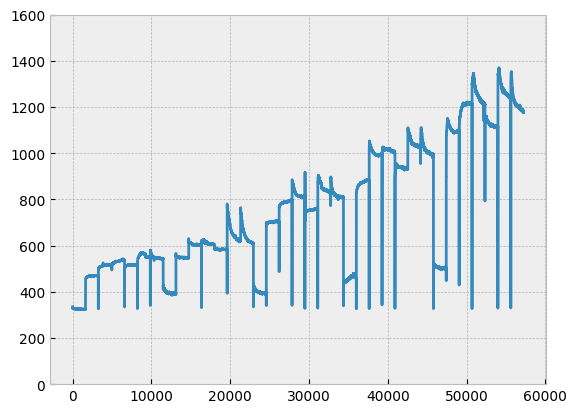

In [14]:
#results_1 = results.loc[results['Nodes'] == 1]

fig, ax = plt.subplots()

#TODO eu só consegui fazer o gráfico bonitinho pq tirei o tempo do eixo x, arrumar(?)
ax.plot(results['index'], results['Active_Power'])
ax.set_ylim(0,1600)
plt.show()


## LU factor

In [15]:
LU_factor = pd.read_csv('./data/lu_factor_poti_736594/energy_monitor_123_lu.csv')
LU_factor.columns = ['Time', 'Energy', 'Active_Power']
LU_factor['Time'] = pd.to_datetime(LU_factor['Time'], format='%Y-%m-%d %H:%M:%S')


experiment_1 = LU_factor.loc[((LU_factor['Time']> '2025-11-28 18:24:03') & (LU_factor['Time']<= '2025-11-28 19:14:03'))]

experiment_1['Active_Power'].mean()

np.float64(456.60428694263607)